In [107]:
import torch
import math
import matplotlib.pyplot as plt
import torch.nn.functional as F

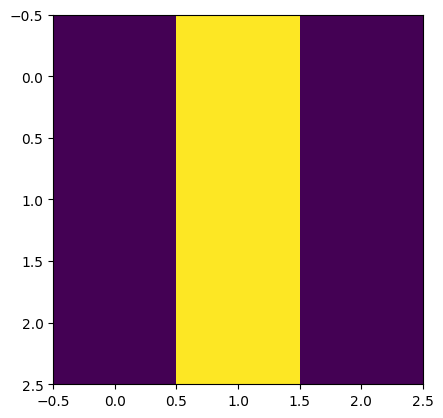

In [130]:
patch_size = 3
assert patch_size % 2 == 1, "Patch size must be odd."
patch = torch.zeros((patch_size, patch_size))
patch[:, patch_size // 2] = 1
patch = patch / patch.sum()
plt.imshow(patch)

In [132]:

# # padding = math.ceil(patch.shape[0] * (math.sqrt(2) - 1) / 2)
# # patch = torch.nn.functional.pad(patch, (padding, padding, padding, padding))

# upsample_image = torch.nn.functional.interpolate(patch[None, None], scale_factor=10)

# # padding = math.ceil(upsample_image.shape[2] * (math.sqrt(2) - 1) / 2)
# # upsample_image = torch.nn.functional.pad(upsample_image, (padding, padding, padding, padding))

# result = torch.nn.functional.interpolate(upsample_image, scale_factor=1/10)

# plt.imshow(result[0, 0])


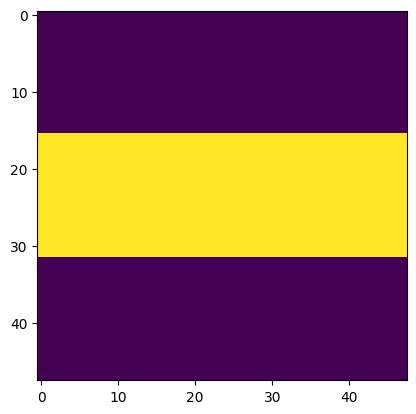

tensor(1.)
tensor(1.)


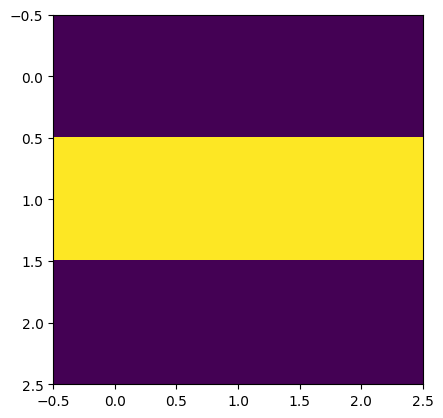

RuntimeError: No active exception to reraise

In [166]:
def rotate_image(image, radians):

    # pad the image with enough zeros so that the rotated patch does not get cropped
    # padding = math.ceil(image.shape[0] * (math.sqrt(2) - 1) / 2)
    # image = torch.nn.functional.pad(image, (padding, padding, padding, padding))

    theta = torch.tensor([
        [math.cos(radians), -math.sin(radians), 0],
        [math.sin(radians), math.cos(radians), 0]
    ])

    grid = torch.nn.functional.affine_grid(theta[None], image.size())
    rotated_image = torch.nn.functional.grid_sample(image, grid, align_corners=False, mode='bicubic')
    return rotated_image


def gaussian_kernel(size, sigma=1):
    x, y = torch.meshgrid(torch.arange(size), torch.arange(size))
    x = x - size // 2
    y = y - size // 2

    gaussian = torch.exp(-(x**2 + y**2) / (2 * sigma**2))

    gaussian /= torch.sum(gaussian)

    return gaussian

k = gaussian_kernel(3, sigma=1)



upsampled_patch = patch[None, None]
upsampled_patch = F.conv_transpose2d(upsampled_patch, k, stride=2)
upsampled_patch = F.conv_transpose2d(upsampled_patch, k, stride=2)
upsampled_patch = F.conv_transpose2d(upsampled_patch, k, stride=2)
upsampled_patch = F.conv_transpose2d(upsampled_patch, k, stride=2)

rotated_patch = rotate_image(upsampled_patch, torch.pi / 2)

plt.imshow(rotated_patch[0, 0])
plt.show()

print(rotated_patch.sum() / upsampled_patch.sum())


downsampled_patch = rotated_patch
downsampled_patch = F.conv2d(downsampled_patch, torch.ones(1, 1, 2, 2), stride=2)
downsampled_patch = F.conv2d(downsampled_patch, torch.ones(1, 1, 2, 2), stride=2)
downsampled_patch = F.conv2d(downsampled_patch, torch.ones(1, 1, 2, 2), stride=2)
downsampled_patch = F.conv2d(downsampled_patch, torch.ones(1, 1, 2, 2), stride=2)

print(downsampled_patch.sum() / patch.sum())

plt.imshow(downsampled_patch[0, 0])
plt.show()





raise


plt.imshow(rotated_patch)
# plt.imshow(rotated_patch)

downsampled_patch = F.conv2d(rotated_patch[None, None], torch.ones(1, 1, 2, 2) / 4, stride=2)

plt.imshow(downsampled_patch[0, 0])

print(downsampled_patch.sum())
# downsampled_patch = torch.nn.functional.interpolate(rotated_patch[None, None], scale_factor=1/10, mode='bilinear').squeeze()

In [172]:
def gaussian_kernel(size, sigma=1):
    x, y = torch.meshgrid(torch.arange(size), torch.arange(size))
    x = x - size // 2
    y = y - size // 2

    gaussian = torch.exp(-(x**2 + y**2) / (2 * sigma**2))

    gaussian /= torch.sum(gaussian)

    return gaussian

k = gaussian_kernel(3, sigma=1)

In [173]:
k

tensor([[0.0751, 0.1238, 0.0751],
        [0.1238, 0.2042, 0.1238],
        [0.0751, 0.1238, 0.0751]])

In [104]:
downsampled_patch.sum()

tensor(1.0170)

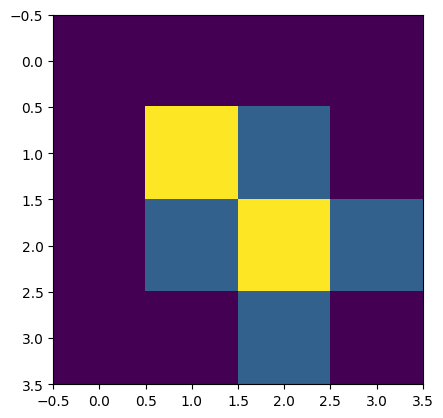

In [105]:
plt.imshow(downsampled_patch)